In [54]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns

dfHis = pd.read_excel('HISTORICO_SUERTES.xlsx')
dfIPSA = pd.read_excel('BD_IPSA_1940.xlsx' )

# Información de los DataFrames
print("---DataFrame HISTORICO---") 
print(dfHis.head())
print(dfHis.columns)
print(dfHis.shape)
print(dfHis.describe())
print(dfHis.isnull().sum())
print("---DataFrame BD_IPSA---") 
print(dfIPSA.head())
print(dfIPSA.columns)
print(dfIPSA.shape)
print(dfIPSA.describe())
print(dfIPSA.isnull().sum())


---DataFrame HISTORICO---
   Período  Hacienda             Nombre  Zona  Tenencia Suerte       Suelo  \
0   201701     80493          LA CONCHA  IP02      51.0   002A   CANTARINA   
1   201701     81284    UKRANIA INCAUCA  IP05      81.0   039B         NaN   
2   201701     80203      EL AMPARO SAA  IP05      31.0    007  CORINTIAS    
3   201701     81380  SAN JUDAS INCAUCA  IP05      82.0   013A         NaN   
4   201701     80298               JAVA  IP06      31.0   025A     GALPON    

   Area Neta  Dist Km   Variedad  ...  Humedad Rel Media Ciclo  \
0       6.00      4.3    CC85-92  ...                      NaN   
1       1.45      NaN    CC85-92  ...                      NaN   
2       8.24     23.0  CC01-1228  ...                      NaN   
3       1.05     66.5  CC01-1940  ...                      NaN   
4       4.53     17.0  RB73-2223  ...                      NaN   

  Oscilacion Temp Med 0-3 Oscilacion Temp Ciclo Sum Oscilacion Temp Ciclo  \
0                     NaN      

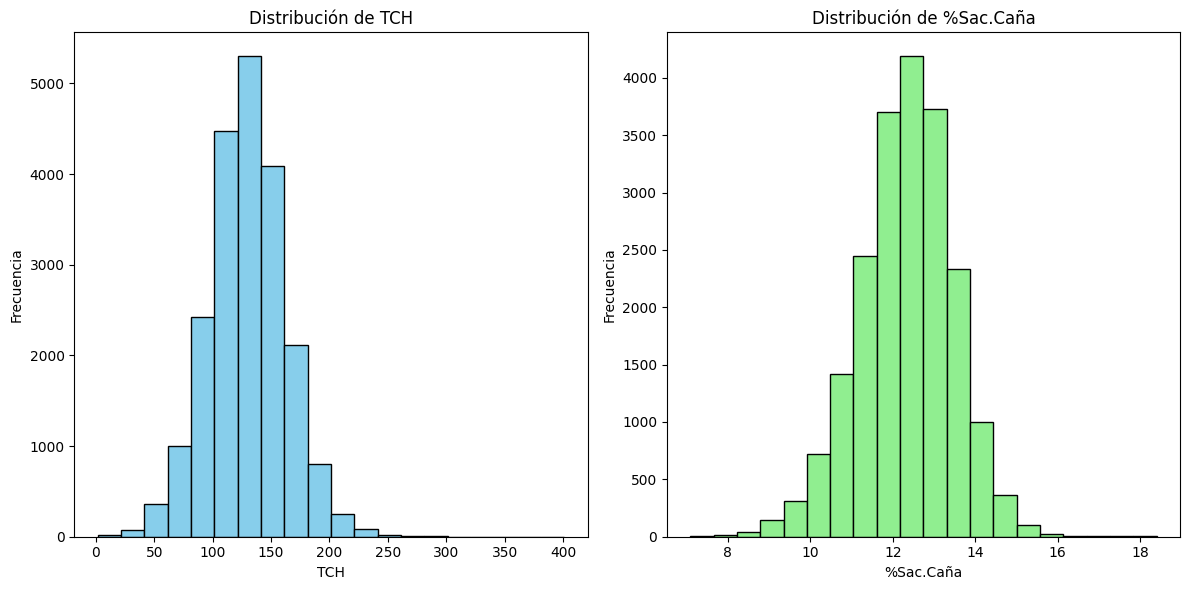

In [55]:
# Visualización de distribuciones
plt.figure(figsize=(12, 6))

# Histograma de TCH
plt.subplot(1, 2, 1)
plt.hist(dfHis['TCH'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de TCH')
plt.xlabel('TCH')
plt.ylabel('Frecuencia')

# Histograma de %Sac.Caña
plt.subplot(1, 2, 2)
plt.hist(dfHis['%Sac.Caña'], bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribución de %Sac.Caña')
plt.xlabel('%Sac.Caña')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

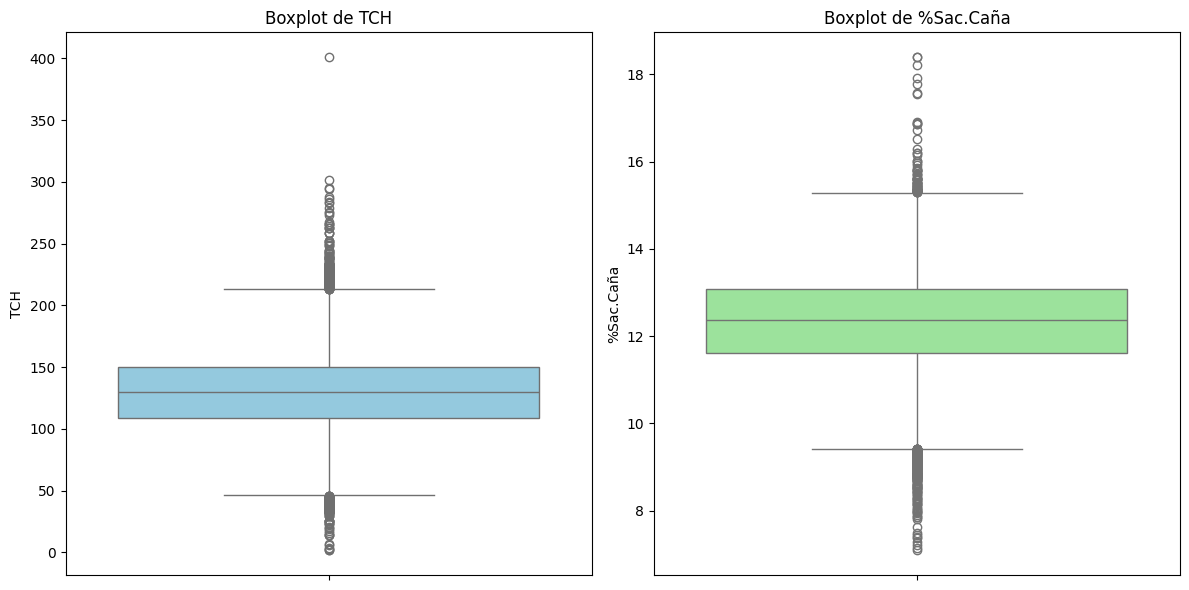

In [56]:
# Boxplots para detectar outliers
plt.figure(figsize=(12, 6))

# Boxplot de TCH
plt.subplot(1, 2, 1)
sns.boxplot(y=dfHis['TCH'], color='skyblue')
plt.title('Boxplot de TCH')

# Boxplot de %Sac.Caña
plt.subplot(1, 2, 2)
sns.boxplot(y=dfHis['%Sac.Caña'], color='lightgreen')
plt.title('Boxplot de %Sac.Caña')

plt.tight_layout()
plt.show()

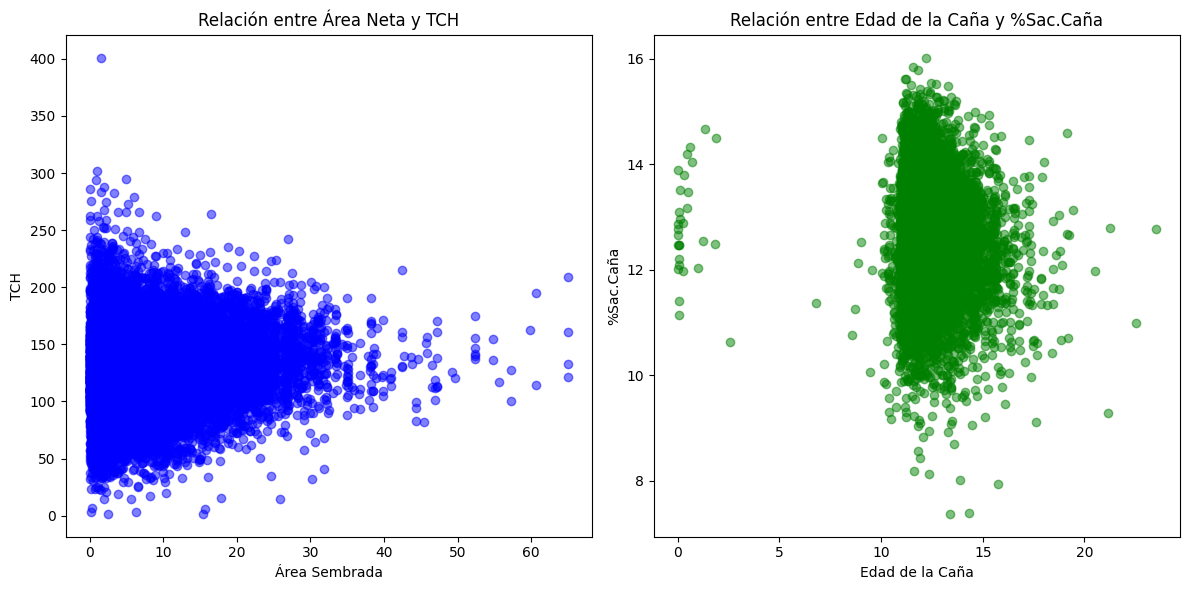

In [57]:
# Gráficos de dispersión
plt.figure(figsize=(12, 6))

# Relación entre TCH y Área Neta
plt.subplot(1, 2, 1)
plt.scatter(dfHis['Area Neta'], dfHis['TCH'], color='blue', alpha=0.5)
plt.title('Relación entre Área Neta y TCH')
plt.xlabel('Área Sembrada')
plt.ylabel('TCH')

# Relación entre %Sac.Caña y otra variable (ejemplo: edad de la caña)
plt.subplot(1, 2, 2)
plt.scatter(dfHis['Edad.Precosecha'], dfHis['%Sac.Caña'], color='green', alpha=0.5)
plt.title('Relación entre Edad de la Caña y %Sac.Caña')
plt.xlabel('Edad de la Caña')
plt.ylabel('%Sac.Caña')

plt.tight_layout()
plt.show()

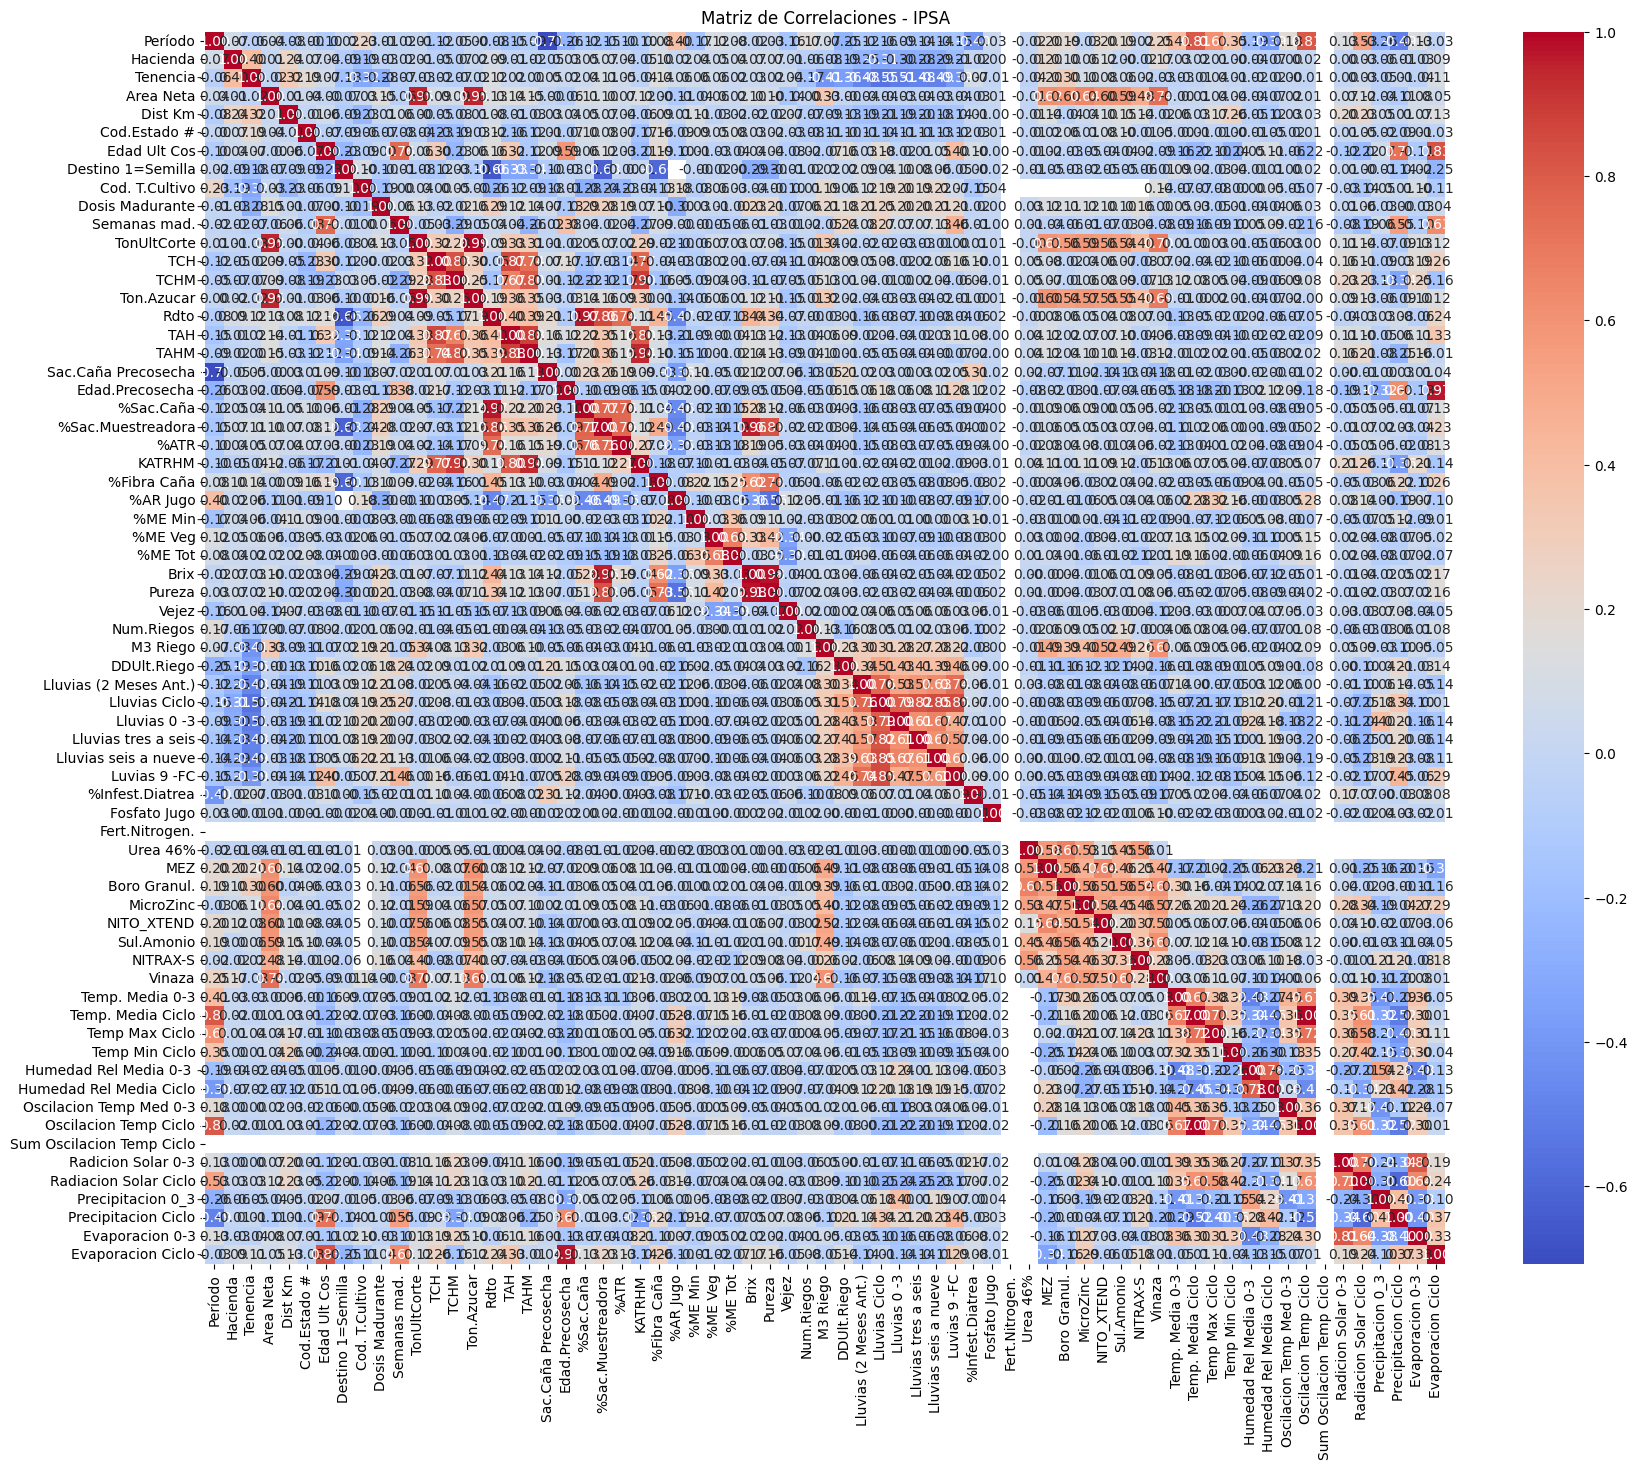

In [58]:
correlation_matrix =dfHis.select_dtypes(include=np.number).corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlaciones - IPSA")
plt.show()

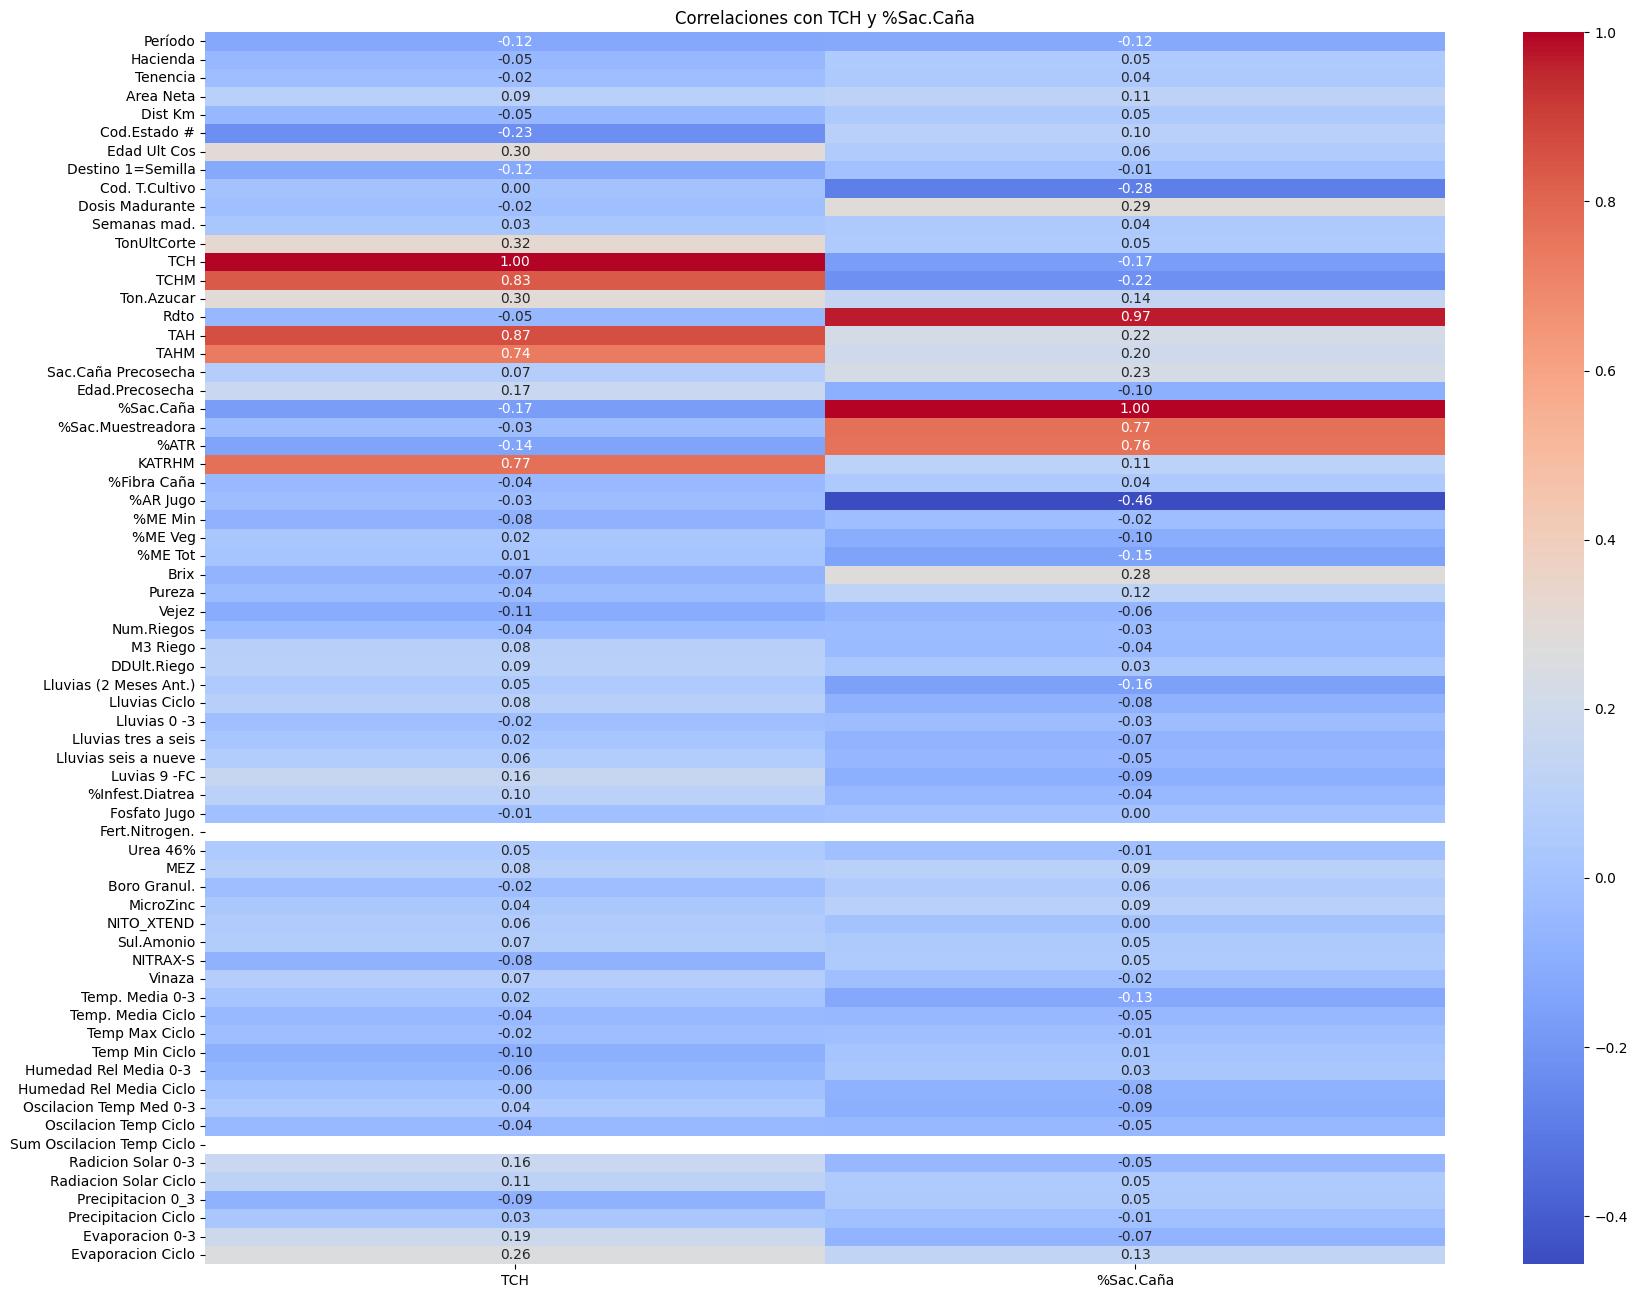

In [59]:
# Filtrar correlaciones con TCH y %Sac.Caña
correlation_with_target = correlation_matrix[['TCH', '%Sac.Caña']]
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_with_target, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlaciones con TCH y %Sac.Caña")
plt.show()

In [60]:
correlation_threshold = 0.4  # Define un umbral de correlación
relevant_features_tch = correlation_matrix['TCH'][abs(correlation_matrix['TCH']) > correlation_threshold].index.tolist()
relevant_features_sac_caña = correlation_matrix['%Sac.Caña'][abs(correlation_matrix['%Sac.Caña']) > correlation_threshold].index.tolist()

print("Variables relevantes para TCH:", relevant_features_tch)
print("Variables relevantes para %Sac.Caña:", relevant_features_sac_caña)

Variables relevantes para TCH: ['TCH', 'TCHM', 'TAH', 'TAHM', 'KATRHM']
Variables relevantes para %Sac.Caña: ['Rdto', '%Sac.Caña', '%Sac.Muestreadora', '%ATR', '%AR Jugo']


In [61]:
# Mostrar todas las columnas y la cantidad de valores nulos en cada una
nulos_por_variable = dfHis.isna().sum()
print(nulos_por_variable)

Período                      0
Hacienda                     0
Nombre                       0
Zona                         0
Tenencia                     1
                         ...  
Radiacion Solar Ciclo    16497
Precipitacion 0_3        16497
Precipitacion Ciclo      16497
Evaporacion 0-3          16497
Evaporacion Ciclo        16497
Length: 85, dtype: int64


In [62]:
# Porcentaje de valores nulos por columna
nulos_por_variable = dfHis.isnull().sum() / len(dfHis) * 100
print(nulos_por_variable.sort_values(ascending=False))

Sum Oscilacion Temp Ciclo    100.000000
Fert.Nitrogen.               100.000000
Urea 46%                      96.561564
NITRAX-S                      96.442669
MEZ                           95.382128
                                ...    
Lluvias seis a nueve           0.000000
Luvias 9 -FC                   0.000000
Lluvias tres a seis            0.000000
Lluvias 0 -3                   0.000000
Lluvias Ciclo                  0.000000
Length: 85, dtype: float64


In [63]:
# Eliminar columnas con más del 50% de valores nulos
threshold = 50  # Porcentaje límite
columnas_a_eliminar = nulos_por_variable[nulos_por_variable > threshold].index
cleandfHis = dfHis.drop(columns=columnas_a_eliminar)

# Eliminar filas con valores nulos en columnas clave
cleandfHis = cleandfHis.dropna(subset=['TCH', '%Sac.Caña'])

In [64]:
cleandfHis.isna().sum()  # Verificar si quedan valores nulos

Período                      0
Hacienda                     0
Nombre                       0
Zona                         0
Tenencia                     1
Suerte                       0
Suelo                     3731
Area Neta                    0
Dist Km                      5
Variedad                     0
Cod.Estado #                 0
Cod.Estado                   0
F.Siembra                    0
Edad Ult Cos                 0
F.Ult.Corte                  0
Destino 1=Semilla            0
Cod. T.Cultivo               2
Cultivo                      2
Fec.Madur.                9416
Producto                  9419
Dosis Madurante             96
Semanas mad.              9416
TonUltCorte                  0
TCH                          0
TCHM                         0
Ton.Azucar                   0
Rdto                         0
TAH                          0
TAHM                         0
Sac.Caña Precosecha       1093
%Sac.Caña                    0
%Sac.Muestreadora         1591
%ATR    

In [65]:
# Eliminar columnas con más del 50% de valores nulos
threshold = 50  # Porcentaje límite
columnas_a_reemplazar = nulos_por_variable[nulos_por_variable <= threshold].index
# Fill only numeric columns with their mean values
numeric_columns = cleandfHis.select_dtypes(include=['number']).columns
cleandfHis[numeric_columns] = cleandfHis[numeric_columns].fillna(dfHis[numeric_columns].mean())

In [66]:
columnas_string=cleandfHis.select_dtypes(include=['object']).columns  # Verificar columnas no numéricas
columnas_fecha = cleandfHis.select_dtypes(include=['datetime']).columns  # Verificar columnas de fecha
for col in columnas_string:
    if cleandfHis[col].isnull().sum() > 0:  # Solo reemplazar si hay valores nulos
        cleandfHis[col] = cleandfHis[col].fillna(cleandfHis[col].mode()[0])  # Reemplazar con la moda de la columna

for col in columnas_fecha:
    if cleandfHis[col].isnull().sum() > 0:  # Solo reemplazar si hay valores nulos
        cleandfHis[col] = cleandfHis[col].fillna(cleandfHis[col].mode()[0])  # Reemplazar con la moda de la columna

In [67]:
cleandfHis.isna().sum()  # Verificar si quedan valores nulos

Período                   0
Hacienda                  0
Nombre                    0
Zona                      0
Tenencia                  0
Suerte                    0
Suelo                     0
Area Neta                 0
Dist Km                   0
Variedad                  0
Cod.Estado #              0
Cod.Estado                0
F.Siembra                 0
Edad Ult Cos              0
F.Ult.Corte               0
Destino 1=Semilla         0
Cod. T.Cultivo            0
Cultivo                   0
Fec.Madur.                0
Producto                  0
Dosis Madurante           0
Semanas mad.              0
TonUltCorte               0
TCH                       0
TCHM                      0
Ton.Azucar                0
Rdto                      0
TAH                       0
TAHM                      0
Sac.Caña Precosecha       0
%Sac.Caña                 0
%Sac.Muestreadora         0
%ATR                      0
KATRHM                    0
%Fibra Caña               0
%AR Jugo            

In [68]:
from sklearn.model_selection import train_test_split

# Variables independientes (features) y dependientes (targets)
X_tch = cleandfHis[relevant_features_tch].drop(columns=['TCH'])  # Excluye la variable objetivo
y_tch = cleandfHis['TCH']

X_sac_caña = cleandfHis[relevant_features_sac_caña].drop(columns=['%Sac.Caña'])
y_sac_caña = cleandfHis['%Sac.Caña']

# División en entrenamiento y prueba
X_train_tch, X_test_tch, y_train_tch, y_test_tch = train_test_split(X_tch, y_tch, test_size=0.2, random_state=42)
X_train_sac_caña, X_test_sac_caña, y_train_sac_caña, y_test_sac_caña = train_test_split(X_sac_caña, y_sac_caña, test_size=0.2, random_state=42)

In [69]:
# Verificar valores nulos en los conjuntos de entrenamiento y prueba
print("Valores nulos en X_train_tch:")
print(X_train_tch.isnull().sum())

print("\nValores nulos en X_test_tch:")
print(X_test_tch.isnull().sum())

print("\nValores nulos en X_train_sac_caña:")
print(X_train_sac_caña.isnull().sum())

print("\nValores nulos en X_test_sac_caña:")
print(X_test_sac_caña.isnull().sum())

Valores nulos en X_train_tch:
TCHM      0
TAH       0
TAHM      0
KATRHM    0
dtype: int64

Valores nulos en X_test_tch:
TCHM      0
TAH       0
TAHM      0
KATRHM    0
dtype: int64

Valores nulos en X_train_sac_caña:
Rdto                 0
%Sac.Muestreadora    0
%ATR                 0
%AR Jugo             0
dtype: int64

Valores nulos en X_test_sac_caña:
Rdto                 0
%Sac.Muestreadora    0
%ATR                 0
%AR Jugo             0
dtype: int64


In [70]:
print("Variables usadas para TCH:", relevant_features_tch)

Variables usadas para TCH: ['TCH', 'TCHM', 'TAH', 'TAHM', 'KATRHM']


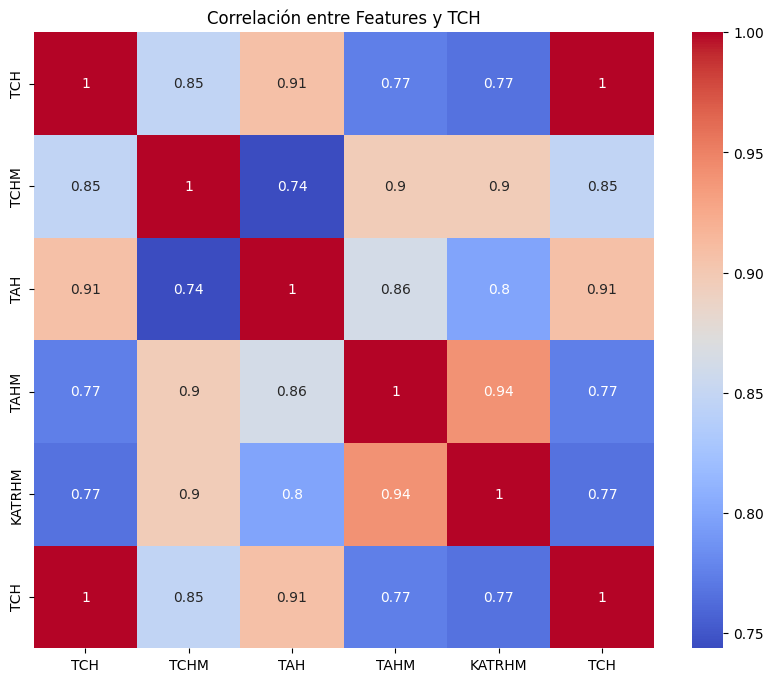

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlación entre features y TCH
corr_matrix = cleandfHis[relevant_features_tch + ['TCH']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlación entre Features y TCH")
plt.show()

In [94]:
# Variables independientes CORREGIDAS (sin data leakage)
relevant_features_tch = [ 'Edad Ult Cos', 'Area Neta', 'Dosis Madurante', 'Suelo', 'Variedad']  # Excluye TCHM, TAH, etc.
relevant_features_sac_caña = ['Dosis Madurante', 'Brix', 'Pureza', 'Edad Ult Cos']  # Excluye Rdto, %Sac.Muestreadora, %ATR

# Separar features y targets
X_tch = cleandfHis[relevant_features_tch].copy()  # No hay que usar .drop() si ya están bien seleccionadas
y_tch = cleandfHis['TCH']

X_sac_caña = cleandfHis[relevant_features_sac_caña].copy()
y_sac_caña = cleandfHis['%Sac.Caña']

In [111]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identificar columnas categóricas
categorical_features = ['Suelo', 'Variedad']  # Ajustar según el dataset

# Crear transformador
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Aplicar a los datos de TCH (ejemplo)
X_tch_encoded = preprocessor.fit_transform(X_tch)

In [112]:
from sklearn.model_selection import train_test_split

# Dividir datos para TCH
X_train_tch, X_test_tch, y_train_tch, y_test_tch = train_test_split(
    X_tch_encoded, y_tch, test_size=0.2, random_state=42
)

# Dividir datos para %Sac.Caña (si hay categóricas, aplicar mismo preprocesamiento)
X_train_sac, X_test_sac, y_train_sac, y_test_sac = train_test_split(
    X_sac_caña, y_sac_caña, test_size=0.2, random_state=42
)

# Verificar nulos (debería ser 0 tras la limpieza)
# Convert to dense array if sparse, and ensure float dtype
if hasattr(X_train_tch, "toarray"):
    X_train_tch_dense = X_train_tch.toarray().astype(float)
else:
    X_train_tch_dense = np.array(X_train_tch, dtype=float)
print("Nulos en X_train_tch:", np.isnan(X_train_tch_dense).sum())

Nulos en X_train_tch: 0


In [113]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_absolute_error, r2_score

# Modelo Lasso para TCH (alpha ajustable)
lasso_tch = Lasso(alpha=0.01)  # Alpha controla la regularización
lasso_tch.fit(X_train_tch, y_train_tch)
y_pred_tch = lasso_tch.predict(X_test_tch)

# Evaluación
print("\n--- Lasso Regression (TCH) ---")
print(f"MAE: {mean_absolute_error(y_test_tch, y_pred_tch):.2f}")
print(f"R2 Score: {r2_score(y_test_tch, y_pred_tch):.2f}")

# Modelo Ridge para %Sac.Caña
ridge_sac = Ridge(alpha=0.1)
ridge_sac.fit(X_train_sac, y_train_sac)
y_pred_sac = ridge_sac.predict(X_test_sac)

print("\n--- Ridge Regression (%Sac.Caña) ---")
print(f"MAE: {mean_absolute_error(y_test_sac, y_pred_sac):.2f}")
print(f"R2 Score: {r2_score(y_test_sac, y_pred_sac):.2f}")


--- Lasso Regression (TCH) ---
MAE: 21.98
R2 Score: 0.23

--- Ridge Regression (%Sac.Caña) ---
MAE: 0.53
R2 Score: 0.58


In [100]:
# Para Lasso (TCH)
print("\nImportancia de Features (Lasso - TCH):")
for feature, coef in zip(preprocessor.get_feature_names_out(), lasso_tch.coef_):
    print(f"{feature}: {coef:.4f}")

# Para Ridge (%Sac.Caña)
print("\nImportancia de Features (Ridge - %Sac.Caña):")
for feature, coef in zip(relevant_features_sac_caña, ridge_sac.coef_):
    print(f"{feature}: {coef:.4f}")


Importancia de Features (Lasso - TCH):
cat__Suelo_AMAIME: -10.5690
cat__Suelo_ARANJUEZ: 2.3183
cat__Suelo_ARGELIA : -4.6021
cat__Suelo_ATENEA: -0.0000
cat__Suelo_BALLESTEROS: -6.3283
cat__Suelo_BRISAS: 0.5337
cat__Suelo_BRITANIA: 13.8205
cat__Suelo_BRITANIA-CHUNDULAR: 0.0000
cat__Suelo_BURRIGA : -9.5446
cat__Suelo_CABAÑA : -0.0000
cat__Suelo_CANELO: 4.3891
cat__Suelo_CANTARINA: 2.5290
cat__Suelo_CARLINA: -21.9954
cat__Suelo_CERRITO : -36.1722
cat__Suelo_CERRITO-NIMA: -21.7570
cat__Suelo_CHAMBURO: -1.1065
cat__Suelo_CHONTADURO: -0.0000
cat__Suelo_CHUNDULAR: 0.0000
cat__Suelo_COKE : 0.0000
cat__Suelo_CORINTIAS : -3.6701
cat__Suelo_CORINTO : 0.0000
cat__Suelo_Calamar: -8.0314
cat__Suelo_Desbaratado: -0.0000
cat__Suelo_Diana: -0.0000
cat__Suelo_ESCOCIA: 7.1475
cat__Suelo_ESMERALDA: 0.0000
cat__Suelo_ESNEDA: -2.3911
cat__Suelo_ESPERANZA: -0.0000
cat__Suelo_FLORIDA: 5.2176
cat__Suelo_FRANCISCANO: 0.0000
cat__Suelo_Floresta: -14.4102
cat__Suelo_GALPON : 7.2674
cat__Suelo_GENOVA: -19.2593
cat

In [116]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Variables independientes CORREGIDAS (sin data leakage)
relevant_features_tch = [ 'Edad Ult Cos', 'Area Neta', 'Dosis Madurante', 'Suelo', 'Variedad']
relevant_features_sac_caña = ['Dosis Madurante', 'Brix', 'Pureza', 'Edad Ult Cos']

# Separar features y targets
X_tch = cleandfHis[relevant_features_tch].copy()
y_tch = cleandfHis['TCH']

X_sac = cleandfHis[relevant_features_sac_caña].copy()
y_sac = cleandfHis['%Sac.Caña']

In [117]:
# Codificar variables categóricas para TCH (ejemplo con 'Suelo' y 'Variedad')
def manual_onehot(df, categorical_cols):
    for col in categorical_cols:
        if col in df.columns:
            dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
            df = pd.concat([df.drop(col, axis=1), dummies], axis=1)
    return df

# Aplicar a los datos
X_tch_encoded = manual_onehot(X_tch, ['Suelo', 'Variedad'])
X_sac_encoded = manual_onehot(X_sac, [])  # No hay categóricas en %Sac.Caña en este ejemplo

In [118]:
# Dividir datos para TCH
X_train_tch, X_test_tch, y_train_tch, y_test_tch = train_test_split(
    X_tch_encoded, y_tch, test_size=0.2, random_state=42
)

# Dividir datos para %Sac.Caña
X_train_sac, X_test_sac, y_train_sac, y_test_sac = train_test_split(
    X_sac_encoded, y_sac, test_size=0.2, random_state=42
)

In [135]:
# Modelo para TCH
lr_tch = LinearRegression()
lr_tch.fit(X_train_tch, y_train_tch)
y_pred_tch_lr = lr_tch.predict(X_test_tch)

# Evaluación para TCH
print("--- Regresión Lineal (TCH) ---")
print(f"MAE: {mean_absolute_error(y_test_tch, y_pred_tch_lr):.2f}")
print(f"MSE: {mean_squared_error(y_test_tch, y_pred_tch_lr):.2f}")
print(f"R2: {r2_score(y_test_tch, y_pred_tch_lr):.2f}")

# Modelo para %Sac.Caña
lr_sac = LinearRegression()
lr_sac.fit(X_train_sac, y_train_sac)
y_pred_sac_lr = lr_sac.predict(X_test_sac)

# Evaluación para %Sac.Caña
print("\n--- Regresión Lineal (%Sac.Caña) ---")
print(f"MAE: {mean_absolute_error(y_test_sac, y_pred_sac_lr):.2f}")
print(f"MSE: {mean_squared_error(y_test_sac, y_pred_sac_lr):.2f}")
print(f"R2: {r2_score(y_test_sac, y_pred_sac_lr):.2f}")

--- Regresión Lineal (TCH) ---
MAE: 21.98
MSE: 830.74
R2: 0.23

--- Regresión Lineal (%Sac.Caña) ---
MAE: 0.53
MSE: 0.56
R2: 0.58


In [132]:
# Coeficientes para TCH
print("\nCoeficientes (TCH):")
for feature, coef in zip(X_train_tch.columns, lr_tch.coef_):
    print(f"{feature}: {coef:.4f}")

# Coeficientes para %Sac.Caña
print("\nCoeficientes (%Sac.Caña):")
for feature, coef in zip(X_train_sac.columns, lr_sac.coef_):
    print(f"{feature}: {coef:.4f}")


Coeficientes (TCH):
Edad Ult Cos: 5.1120
Area Neta: 0.3233
Dosis Madurante: -4.3751
Suelo_ARANJUEZ: 20.0025
Suelo_ARGELIA : 4.8464
Suelo_ATENEA: -23.8853
Suelo_BALLESTEROS: 4.5133
Suelo_BRISAS: 15.6779
Suelo_BRITANIA: 27.5317
Suelo_BRITANIA-CHUNDULAR: 0.0000
Suelo_BURRIGA : 1.6225
Suelo_CABAÑA : 11.4487
Suelo_CANELO: 19.6422
Suelo_CANTARINA: 16.3411
Suelo_CARLINA: -17.0584
Suelo_CERRITO : -25.0045
Suelo_CERRITO-NIMA: -10.3126
Suelo_CHAMBURO: 5.1253
Suelo_CHONTADURO: 10.2793
Suelo_CHUNDULAR: 14.0303
Suelo_COKE : 16.6339
Suelo_CORINTIAS : 8.0202
Suelo_CORINTO : 22.2077
Suelo_Calamar: -19.9284
Suelo_Desbaratado: 4.4071
Suelo_Diana: 0.4143
Suelo_ESCOCIA: 21.1976
Suelo_ESMERALDA: 12.6327
Suelo_ESNEDA: 8.0299
Suelo_ESPERANZA: -7.8531
Suelo_FLORIDA: 20.6067
Suelo_FRANCISCANO: 15.8778
Suelo_Floresta: -9.3459
Suelo_GALPON : 19.0910
Suelo_GENOVA: -8.7069
Suelo_GENOVEZ: 17.8641
Suelo_GENOVEZ-PALMIRA: 13.6255
Suelo_GUABITO: 5.6652
Suelo_GUACARI: 11.4804
Suelo_GUACHAL: 18.2493
Suelo_GUADUAL: 15.40

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Modelo para TCH
rf_tch = RandomForestRegressor(
    n_estimators=100,  # Número de árboles
    max_depth=10,      # Profundidad máxima (evitar overfitting)
    random_state=42
)
rf_tch.fit(X_train_tch, y_train_tch)
y_pred_tch_rf = rf_tch.predict(X_test_tch)

# Evaluación para TCH
print("--- Random Forest (TCH) ---")
print(f"MAE: {mean_absolute_error(y_test_tch, y_pred_tch_rf):.2f}")
print(f"MSE: {mean_squared_error(y_test_tch, y_pred_tch_rf):.2f}")
print(f"R2: {r2_score(y_test_tch, y_pred_tch_rf):.2f}")

# Modelo para %Sac.Caña
rf_sac = RandomForestRegressor(
    n_estimators=100,
    max_depth=5,       # Menor profundidad (target menos variable)
    random_state=42
)
rf_sac.fit(X_train_sac, y_train_sac)
y_pred_sac_rf = rf_sac.predict(X_test_sac)

# Evaluación para %Sac.Caña
print("\n--- Random Forest (%Sac.Caña) ---")
print(f"MAE: {mean_absolute_error(y_test_sac, y_pred_sac_rf):.2f}")
print(f"MSE: {mean_squared_error(y_test_sac, y_pred_sac_rf):.2f}")
print(f"R2: {r2_score(y_test_sac, y_pred_sac_rf):.2f}")

--- Random Forest (TCH) ---
MAE: 21.50
MSE: 787.34
R2: 0.27

--- Random Forest (%Sac.Caña) ---
MAE: 0.20
MSE: 0.18
R2: 0.87


In [125]:
# Importancia para TCH
print("\nImportancia de Features (TCH):")
for feature, importance in zip(X_train_tch.columns, rf_tch.feature_importances_):
    print(f"{feature}: {importance:.4f}")

# Importancia para %Sac.Caña
print("\nImportancia de Features (%Sac.Caña):")
for feature, importance in zip(X_train_sac.columns, rf_sac.feature_importances_):
    print(f"{feature}: {importance:.4f}")


Importancia de Features (TCH):
Edad Ult Cos: 0.3835
Area Neta: 0.1167
Dosis Madurante: 0.0659
Suelo_ARANJUEZ: 0.0000
Suelo_ARGELIA : 0.0004
Suelo_ATENEA: 0.0000
Suelo_BALLESTEROS: 0.0010
Suelo_BRISAS: 0.0007
Suelo_BRITANIA: 0.0007
Suelo_BRITANIA-CHUNDULAR: 0.0000
Suelo_BURRIGA : 0.0018
Suelo_CABAÑA : 0.0000
Suelo_CANELO: 0.0012
Suelo_CANTARINA: 0.0002
Suelo_CARLINA: 0.0020
Suelo_CERRITO : 0.0676
Suelo_CERRITO-NIMA: 0.0107
Suelo_CHAMBURO: 0.0004
Suelo_CHONTADURO: 0.0000
Suelo_CHUNDULAR: 0.0001
Suelo_COKE : 0.0000
Suelo_CORINTIAS : 0.0082
Suelo_CORINTO : 0.0001
Suelo_Calamar: 0.0000
Suelo_Desbaratado: 0.0000
Suelo_Diana: 0.0000
Suelo_ESCOCIA: 0.0006
Suelo_ESMERALDA: 0.0000
Suelo_ESNEDA: 0.0004
Suelo_ESPERANZA: 0.0000
Suelo_FLORIDA: 0.0003
Suelo_FRANCISCANO: 0.0008
Suelo_Floresta: 0.0005
Suelo_GALPON : 0.0261
Suelo_GENOVA: 0.0146
Suelo_GENOVEZ: 0.0008
Suelo_GENOVEZ-PALMIRA: 0.0000
Suelo_GUABITO: 0.0010
Suelo_GUACARI: 0.0000
Suelo_GUACHAL: 0.0000
Suelo_GUADUAL: 0.0018
Suelo_GUADUALITO : 0

In [134]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Modelo para TCH
xgb_tch = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=150,      # Número de árboles
    max_depth=6,           # Profundidad máxima
    learning_rate=0.1,     # Tasa de aprendizaje
    random_state=42
)
xgb_tch.fit(X_train_tch, y_train_tch)
y_pred_tch_xgb = xgb_tch.predict(X_test_tch)

# Evaluación para TCH
print("--- XGBoost (TCH) ---")
print(f"MAE: {mean_absolute_error(y_test_tch, y_pred_tch_xgb):.2f}")
print(f"MSE: {mean_squared_error(y_test_tch, y_pred_tch_xgb):.2f}")
print(f"R2: {r2_score(y_test_tch, y_pred_tch_xgb):.2f}")

# Modelo para %Sac.Caña
xgb_sac = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    max_depth=4,           # Menor profundidad para target menos variable
    learning_rate=0.05,    # Tasa de aprendizaje más baja
    random_state=42
)
xgb_sac.fit(X_train_sac, y_train_sac)
y_pred_sac_xgb = xgb_sac.predict(X_test_sac)

# Evaluación para %Sac.Caña
print("\n--- XGBoost (%Sac.Caña) ---")
print(f"MAE: {mean_absolute_error(y_test_sac, y_pred_sac_xgb):.2f}")
print(f"MSE: {mean_squared_error(y_test_sac, y_pred_sac_xgb):.2f}")
print(f"R2: {r2_score(y_test_sac, y_pred_sac_xgb):.2f}")

--- XGBoost (TCH) ---
MAE: 20.77
MSE: 739.91
R2: 0.31

--- XGBoost (%Sac.Caña) ---
MAE: 0.13
MSE: 0.16
R2: 0.88


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo (reemplaza con tus resultados reales)
# Corrige la sintaxis y usa valores reales si están disponibles
data = {
    'Modelo': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'R2_TCH': [r2_score(y_test_tch, y_pred_tch_lr), r2_score(y_test_tch, y_pred_tch_rf), r2_score(y_test_tch, y_pred_tch_xgb)],
    'MAE_TCH': [mean_absolute_error(y_test_tch, y_pred_tch_lr), mean_absolute_error(y_test_tch, y_pred_tch_rf), mean_absolute_error(y_test_tch, y_pred_tch_xgb)],
    'R2_Sac_Caña': [r2_score(y_test_sac, y_pred_sac_lr), r2_score(y_test_sac, y_pred_sac_rf), r2_score(y_test_sac, y_pred_sac_xgb)],
    'MAE_Sac_Caña': [mean_absolute_error(y_test_sac, y_pred_sac_lr), mean_absolute_error(y_test_sac, y_pred_sac_rf), mean_absolute_error(y_test_sac, y_pred_sac_xgb)],
    'MSE_TCH': [mean_squared_error(y_test_tch, y_pred_tch_lr), mean_squared_error(y_test_tch, y_pred_tch_rf), mean_squared_error(y_test_tch, y_pred_tch_xgb)],
    'MSE_Sac_Caña': [mean_squared_error(y_test_sac, y_pred_sac_lr), mean_squared_error(y_test_sac, y_pred_sac_rf), mean_squared_error(y_test_sac, y_pred_sac_xgb)]
}
df_results = pd.DataFrame(data)

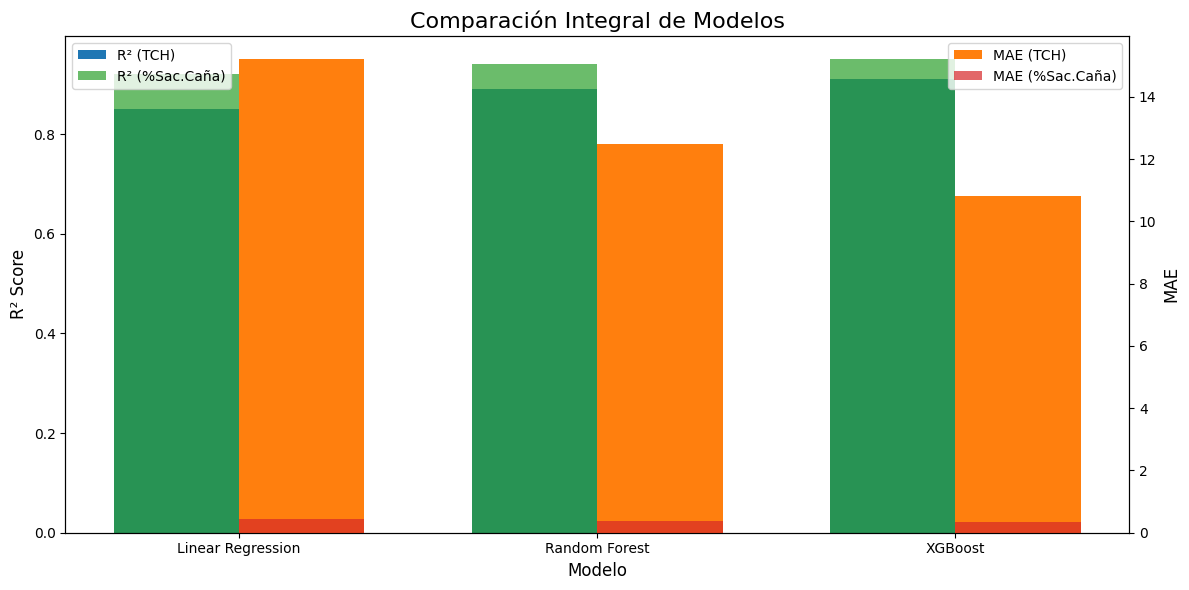

In [131]:
# Configuración
x = np.arange(len(df_results['Modelo']))  # Posiciones de las barras
width = 0.35  # Ancho de las barras

fig, ax = plt.subplots(figsize=(12, 6))

# Barras para R2
bars1 = ax.bar(x - width/2, df_results['R2_TCH'], width, label='R² (TCH)', color='#1f77b4')
bars2 = ax.bar(x - width/2, df_results['R2_Sac'], width, label='R² (%Sac.Caña)', color='#2ca02c', alpha=0.7)

# Barras para MAE (usando eje secundario)
ax2 = ax.twinx()
bars3 = ax2.bar(x + width/2, df_results['MAE_TCH'], width, label='MAE (TCH)', color='#ff7f0e')
bars4 = ax2.bar(x + width/2, df_results['MAE_Sac'], width, label='MAE (%Sac.Caña)', color='#d62728', alpha=0.7)

# Etiquetas y título
ax.set_xlabel('Modelo', fontsize=12)
ax.set_ylabel('R² Score', fontsize=12)
ax2.set_ylabel('MAE', fontsize=12)
ax.set_title('Comparación Integral de Modelos', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(df_results['Modelo'])
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [91]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Modelo para TCH
lr_model_tch = LinearRegression()
lr_model_tch.fit(X_train_tch, y_train_tch)

# Predicciones para TCH
y_pred_tch_lr = lr_model_tch.predict(X_test_tch)

# Evaluación del modelo para TCH
print("\n--- Linear Regression (TCH) ---")
print(f"MAE: {mean_absolute_error(y_test_tch, y_pred_tch_lr):.2f}")
print(f"MSE: {mean_squared_error(y_test_tch, y_pred_tch_lr):.2f}")
print(f"R2 Score: {r2_score(y_test_tch, y_pred_tch_lr):.2f}")

# Modelo para %Sac.Caña
lr_model_sac_caña = LinearRegression()
lr_model_sac_caña.fit(X_train_sac_caña, y_train_sac_caña)

# Predicciones para %Sac.Caña
y_pred_sac_caña_lr = lr_model_sac_caña.predict(X_test_sac_caña)

# Evaluación del modelo para %Sac.Caña
print("\n--- Linear Regression (%Sac.Caña) ---")
print(f"MAE: {mean_absolute_error(y_test_sac_caña, y_pred_sac_caña_lr):.2f}")
print(f"MSE: {mean_squared_error(y_test_sac_caña, y_pred_sac_caña_lr):.2f}")
print(f"R2 Score: {r2_score(y_test_sac_caña, y_pred_sac_caña_lr):.2f}")


--- Linear Regression (TCH) ---
MAE: 1.17
MSE: 4.57
R2 Score: 1.00

--- Linear Regression (%Sac.Caña) ---
MAE: 0.11
MSE: 0.05
R2 Score: 0.96


In [78]:
from sklearn.ensemble import RandomForestRegressor

# Modelo para TCH
rf_model_tch = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_tch.fit(X_train_tch, y_train_tch)

# Predicciones para TCH
y_pred_tch_rf = rf_model_tch.predict(X_test_tch)

# Evaluación del modelo para TCH
print("\n--- Random Forest (TCH) ---")
print(f"MAE: {mean_absolute_error(y_test_tch, y_pred_tch_rf):.2f}")
print(f"MSE: {mean_squared_error(y_test_tch, y_pred_tch_rf):.2f}")
print(f"R2 Score: {r2_score(y_test_tch, y_pred_tch_rf):.2f}")

# Modelo para %Sac.Caña
rf_model_sac_caña = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_sac_caña.fit(X_train_sac_caña, y_train_sac_caña)

# Predicciones para %Sac.Caña
y_pred_sac_caña_rf = rf_model_sac_caña.predict(X_test_sac_caña)

# Evaluación del modelo para %Sac.Caña
print("\n--- Random Forest (%Sac.Caña) ---")
print(f"MAE: {mean_absolute_error(y_test_sac_caña, y_pred_sac_caña_rf):.2f}")
print(f"MSE: {mean_squared_error(y_test_sac_caña, y_pred_sac_caña_rf):.2f}")
print(f"R2 Score: {r2_score(y_test_sac_caña, y_pred_sac_caña_rf):.2f}")


--- Random Forest (TCH) ---
MAE: 1.35
MSE: 7.03
R2 Score: 0.99

--- Random Forest (%Sac.Caña) ---
MAE: 0.07
MSE: 0.03
R2 Score: 0.98


In [80]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Modelo para TCH
xgb_model_tch = XGBRegressor(
    n_estimators=100,  # Número de árboles
    learning_rate=0.1,  # Tasa de aprendizaje
    max_depth=5,       # Profundidad máxima de los árboles
    random_state=42
)
xgb_model_tch.fit(X_train_tch, y_train_tch)

# Predicciones y evaluación para TCH
y_pred_tch_xgb = xgb_model_tch.predict(X_test_tch)
print("\n--- XGBoost (TCH) ---")
print(f"MAE: {mean_absolute_error(y_test_tch, y_pred_tch_xgb):.2f}")
print(f"MSE: {mean_squared_error(y_test_tch, y_pred_tch_xgb):.2f}")
print(f"R2 Score: {r2_score(y_test_tch, y_pred_tch_xgb):.2f}")

# Modelo para %Sac.Caña
xgb_model_sac = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,  # Menor profundidad para evitar overfitting en datos más sensibles
    random_state=42
)
xgb_model_sac.fit(X_train_sac_caña, y_train_sac_caña)

# Predicciones y evaluación para %Sac.Caña
y_pred_sac_xgb = xgb_model_sac.predict(X_test_sac_caña)
print("\n--- XGBoost (%Sac.Caña) ---")
print(f"MAE: {mean_absolute_error(y_test_sac_caña, y_pred_sac_xgb):.2f}")
print(f"MSE: {mean_squared_error(y_test_sac_caña, y_pred_sac_xgb):.2f}")
print(f"R2 Score: {r2_score(y_test_sac_caña, y_pred_sac_xgb):.2f}")


--- XGBoost (TCH) ---
MAE: 1.59
MSE: 6.54
R2 Score: 0.99

--- XGBoost (%Sac.Caña) ---
MAE: 0.07
MSE: 0.03
R2 Score: 0.98



Resultados para TCH:
              Modelo       MAE       MSE        R2
0  Linear Regression  1.169516  4.568858  0.995745
1      Random Forest  1.346377  7.032932  0.993450
2            XGBoost  1.591297  6.543387  0.993906

Resultados para %Sac.Caña:
              Modelo       MAE       MSE        R2
0  Linear Regression  0.109850  0.053806  0.959517
1      Random Forest  0.070407  0.028856  0.978289
2            XGBoost  0.072496  0.031515  0.976288


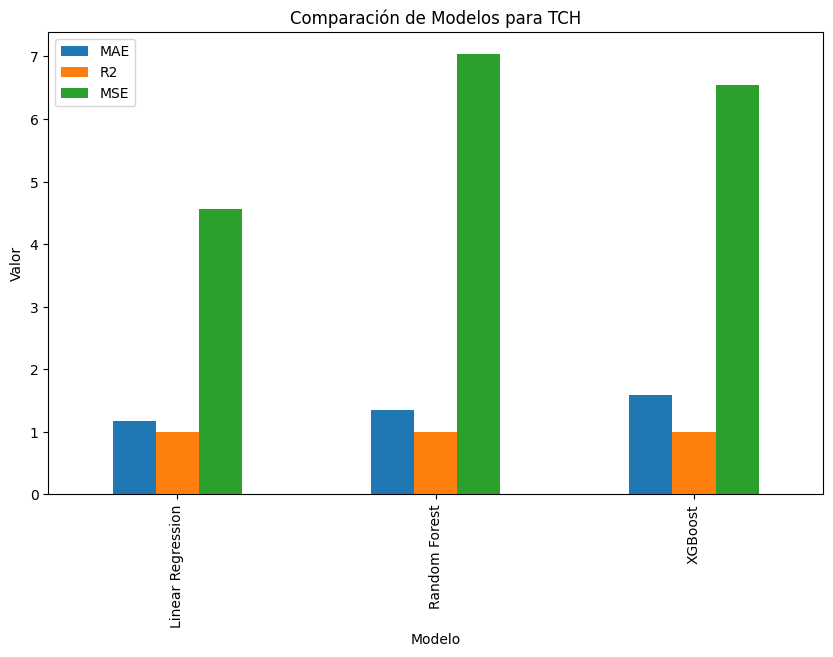

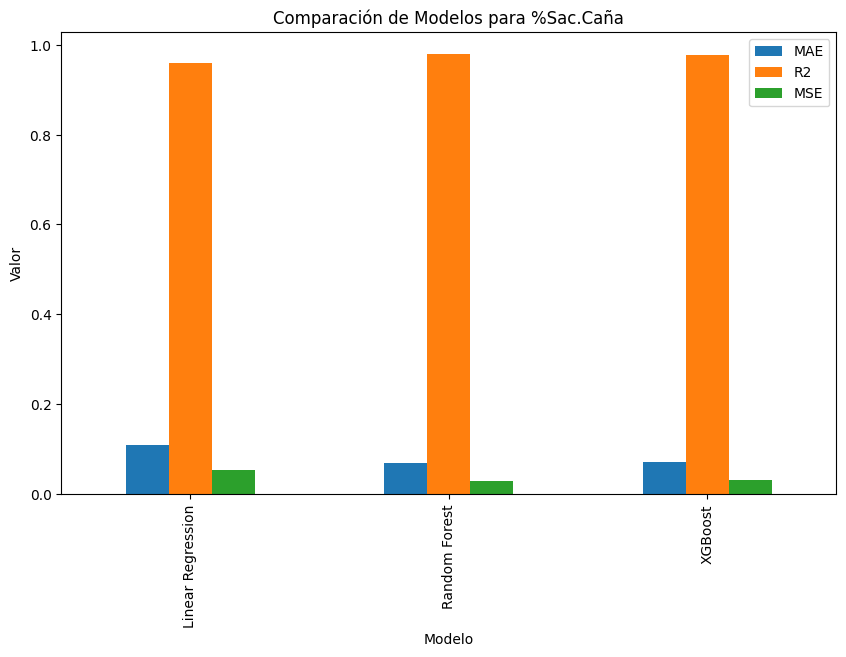

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Comparar métricas para TCH
resultados_tch = pd.DataFrame({
    'Modelo': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MAE': [mean_absolute_error(y_test_tch, y_pred_tch_lr), mean_absolute_error(y_test_tch, y_pred_tch_rf), mean_absolute_error(y_test_tch, y_pred_tch_xgb)],
    'MSE': [mean_squared_error(y_test_tch, y_pred_tch_lr), mean_squared_error(y_test_tch, y_pred_tch_rf), mean_squared_error(y_test_tch, y_pred_tch_xgb)],
    'R2': [r2_score(y_test_tch, y_pred_tch_lr), r2_score(y_test_tch, y_pred_tch_rf), r2_score(y_test_tch, y_pred_tch_xgb)]
})

# Comparar métricas para %Sac.Caña
resultados_sac_caña = pd.DataFrame({
    'Modelo': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'MAE': [mean_absolute_error(y_test_sac_caña, y_pred_sac_caña_lr), mean_absolute_error(y_test_sac_caña, y_pred_sac_caña_rf), mean_absolute_error(y_test_sac_caña, y_pred_sac_xgb)],
    'MSE': [mean_squared_error(y_test_sac_caña, y_pred_sac_caña_lr), mean_squared_error(y_test_sac_caña, y_pred_sac_caña_rf), mean_squared_error(y_test_sac_caña, y_pred_sac_xgb)],
    'R2': [r2_score(y_test_sac_caña, y_pred_sac_caña_lr), r2_score(y_test_sac_caña, y_pred_sac_caña_rf), r2_score(y_test_sac_caña, y_pred_sac_xgb)]
})

# Visualizar resultados
print("\nResultados para TCH:")
print(resultados_tch)

print("\nResultados para %Sac.Caña:")
print(resultados_sac_caña)

# Gráfico comparativo
resultados_tch.set_index('Modelo')[['MAE', 'R2', 'MSE']].plot(kind='bar', figsize=(10, 6), title="Comparación de Modelos para TCH")
plt.ylabel("Valor")
plt.show()

resultados_sac_caña.set_index('Modelo')[['MAE', 'R2', 'MSE']].plot(kind='bar', figsize=(10, 6), title="Comparación de Modelos para %Sac.Caña")
plt.ylabel("Valor")
plt.show()